# Kaden Buffaloe and Tyson Merrill

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
import scipy.stats as stats


https://www.kaggle.com/datasets/abhayayare/employee-data-simulation-it-industry

# Background and Business Problem



In the competitive IT job market, understanding the relationship between years of experience and salary is crucial for both employers and employees. Companies need data-driven insights to ensure fair compensation, retain top talent, and attract skilled professionals, while employees seek transparency in salary expectations as they progress in their careers.

Our analysis aims to answer key questions:

- How strongly does experience influence salary in IT roles? 
- Does the data indicate salary plateaus after a certain number of years?
- Can a predictive model help estimate fair salaries based on experience?


By conducting exploratory data analysis and building predictive models, we aim to provide evidence-based salary benchmarks that can be used for HR decision-making, salary negotiations, and workforce planning in the IT sector.

# Load In Data and Select Columns For Analysis

In [103]:
#load in the dataset and display heading 
employee = pd.read_csv("../../01_project/DATA/employee_data.csv")
employee.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [104]:
#Establish our variables to use in the analysis 
emp_trim = employee[['Experience (Years)', 'Salary']].dropna()
emp_trim = emp_trim.rename(columns = {'Experience (Years)': 'exp_yr', 'Salary': 'salary'})

emp_trim.head()

,exp_yr,salary
0,4,109976
1,6,120088
2,17,181301
3,7,77530
4,13,152397


# Exploratory Data Analysis


In [105]:
#See what the summary of our data is looking like
emp_trim.describe()

,exp_yr,salary
count,400.000000,400.00000
mean,9.670000,131701.19750
std,6.101571,43351.50899
min,0.000000,43643.00000
25%,4.000000,100484.75000
50%,10.000000,128561.50000
75%,15.000000,157735.00000
max,20.000000,269950.00000


- One thing that I noticed is that we have a very large standard deviation for years and for salary, this might suggest some outliers or a lot of variance in the data that we have. 
- The medain salary ($128,561.50) falls below the average salary sugesting large outliers that are pulling the data and creating the skew that we are seeing. This suggests that we may need to take position into account in future analysis, as senior positions may be much higher paying

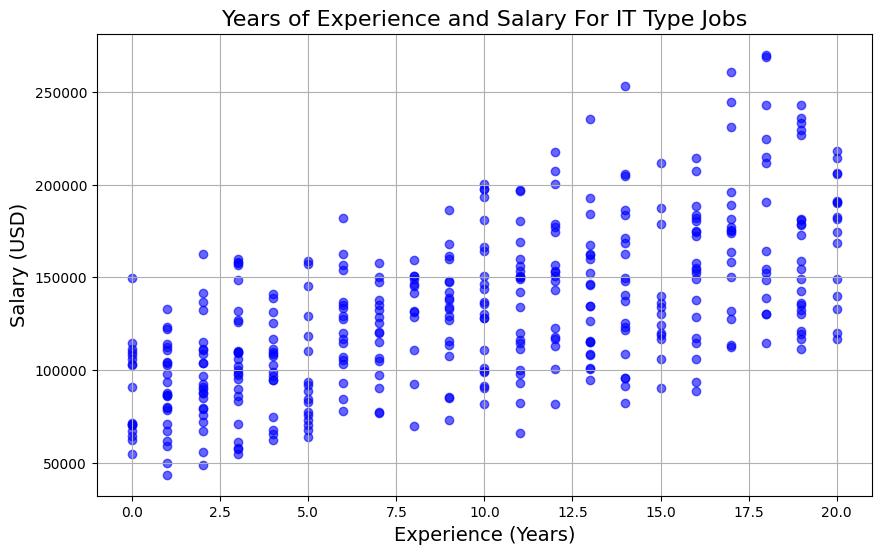

In [106]:
# Create a scatterplot to view initial relationship
plt.figure(figsize=(10, 6))
plt.scatter(emp_trim['exp_yr'], emp_trim['salary'], color='blue', alpha=0.6)
plt.title('Years of Experience and Salary For IT Type Jobs', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.grid(True)
plt.show()

- Before applying any sort transformations it appears that we have a moderately strong, positve, and linear realtionship between how much experience an IT employee has and their salary. 

array([[<Axes: title={'center': 'exp_yr'}>,
        <Axes: title={'center': 'salary'}>]], dtype=object)

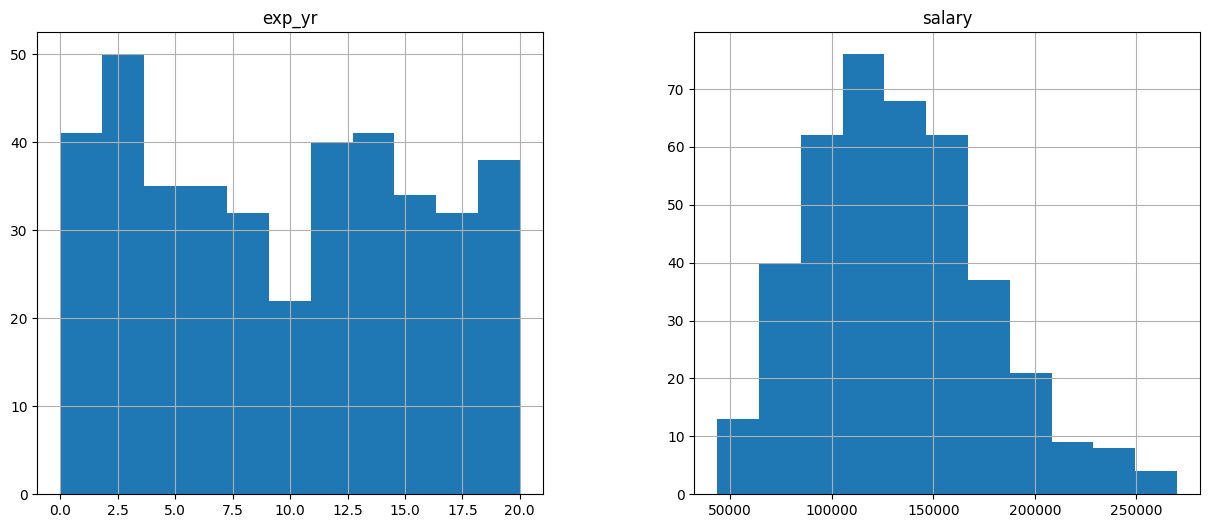

In [107]:
# explore how normally distributed our variables are currently so we have an idea if we will need to transform them later
emp_trim.hist(figsize=(15, 6), bins = 11)

In [108]:
#our distirubtion of salary is right skewed so we will perform a transformation to see if this fixes our distributions 
emp_trim['salary_sqrt'] = np.sqrt(emp_trim['salary'])
emp_trim['salary_log'] = np.log(emp_trim['salary']+1)

emp_trim['exp_yr_sqrt'] =  np.sqrt(emp_trim['exp_yr'])
emp_trim['exp_yr_log'] =  np.log(emp_trim['exp_yr'] +1)

array([[<Axes: title={'center': 'exp_yr'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_sqrt'}>,
        <Axes: title={'center': 'salary_log'}>],
       [<Axes: title={'center': 'exp_yr_sqrt'}>,
        <Axes: title={'center': 'exp_yr_log'}>]], dtype=object)

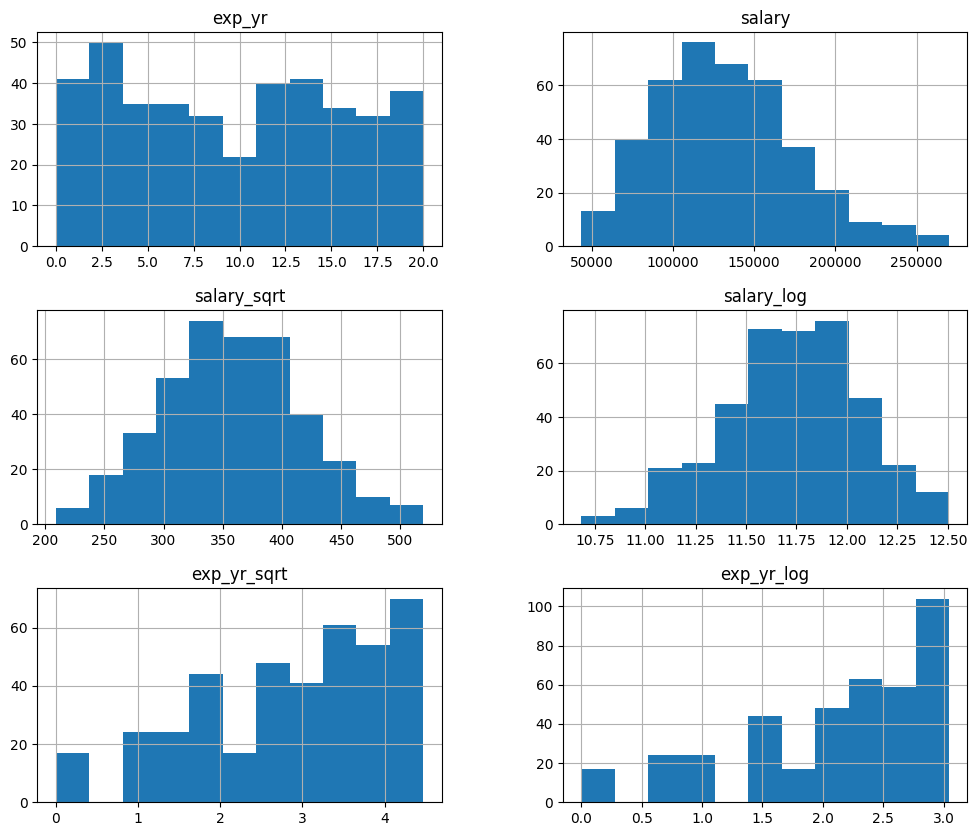

In [109]:
emp_trim.hist(figsize=(12, 10), bins = 11)

 - It looks like the square root of salary appears to be the more normally distributed and therefore if we need to perform any transformations later on this will be a good point for us to start at. Transforming exp_yr did not appear to do anything.

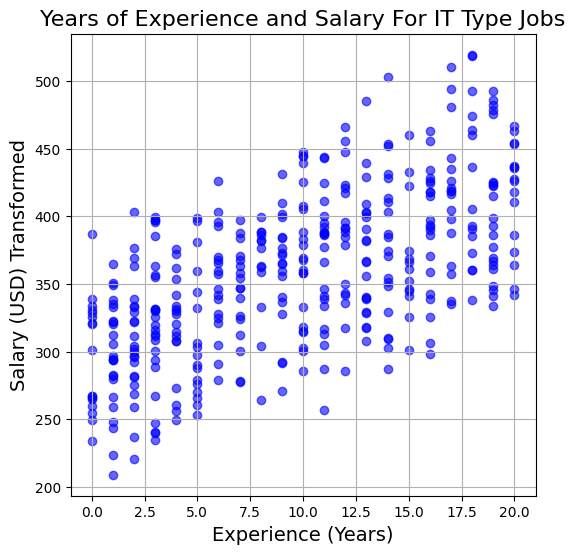

In [110]:
# Create a scatterplot for salary_sqrt and exp_yr
plt.figure(figsize=(6, 6))
plt.scatter(emp_trim['exp_yr'], emp_trim['salary_sqrt'], color='blue', alpha=0.6)
plt.title('Years of Experience and Salary For IT Type Jobs', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=14)
plt.ylabel('Salary (USD) Transformed', fontsize=14)
plt.grid(True)
plt.show()

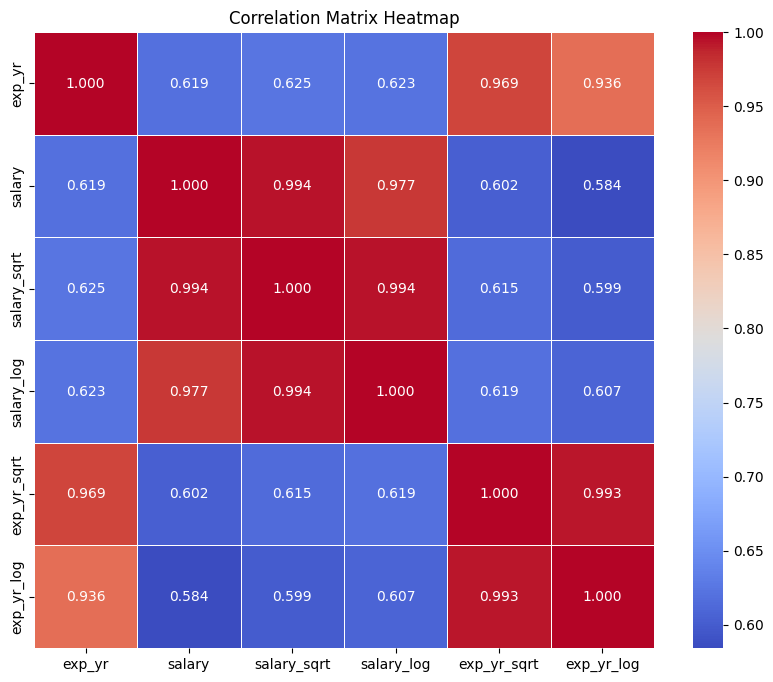

In [111]:
# Compute the correlation matrix
corr_matrix = emp_trim.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()



- Based off of the heatmap showing the correlations between our transformed salary variable and the exp_yr there is really no differerence in our coeffience (.62) for all combinations (sqrt, log, or normal). For this reason we will attempt to perform the simple linear regression with the normal raw data first and go from their. 

# Perform Simple Linear Regression


In [112]:
#Perform the Simple linear regression 
# Prepare data
y = emp_trim['salary']
X = sm.add_constant(emp_trim['exp_yr'])

In [113]:
# Fit simple linear regression model using ordinary least squares
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     246.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           1.36e-43
Time:                        17:39:02   Log-Likelihood:                -4741.5
No. Observations:                 400   AIC:                             9487.
Df Residuals:                     398   BIC:                             9495.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.921e+04   3198.586     27.889      0.0

- ADD THE THEORETICAL EQUATION HERE OF THE LINE? 

In [114]:
#add the residuals and the fitted values to our dataframe
emp_trim['res_raw'] = res.resid
emp_trim['fittedvalues_raw'] = res.fittedvalues
emp_trim.head()

,exp_yr,salary,salary_sqrt,salary_log,exp_yr_sqrt,exp_yr_log,res_raw,fittedvalues_raw
0,4,109976,331.626296,11.608027,2.000000,1.609438,3192.405143,106783.594857
1,6,120088,346.537155,11.695988,2.449490,1.945910,4515.127314,115572.872686
2,17,181301,425.794551,12.107919,4.123106,2.890372,17387.099260,163913.900740
3,7,77530,278.442095,11.258433,2.645751,2.079442,-42437.511600,119967.511600
4,13,152397,390.380584,11.934251,3.605551,2.639057,6061.654916,146335.345084


C:\Users\ksbuf\AppData\Local\Temp\ipykernel_13448\1940847561.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res.params[0] + res.params[1] * emp_trim['exp_yr'],


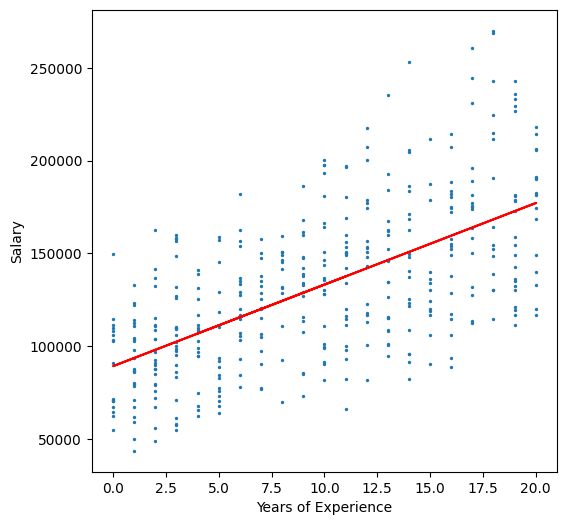

In [115]:
#Add the OLS line to our original scatter plot to see how it fits

fig = plt.figure(figsize = (6, 6))
plt.scatter(emp_trim['exp_yr'], 
            y, 
            s = 2)
plt.plot(emp_trim['exp_yr'], 
         res.params[0] + res.params[1] * emp_trim['exp_yr'], 
         'r') 
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.show()

## Check all Assumptions

### Add Specific Assumptions Here and add more as needed  BE SURE TO INCLUDE INTERPRETATIONS OF EACH

### 1. (L) X vs Y is linear

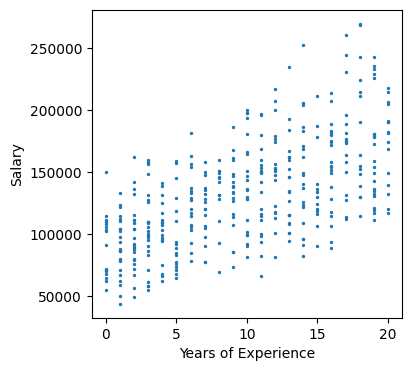

In [116]:
# Scatterplot
fig = plt.figure(figsize = (4, 4))
plt.scatter(x = emp_trim['exp_yr'], 
            y = emp_trim['salary'], 
            s = 2)
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.show()

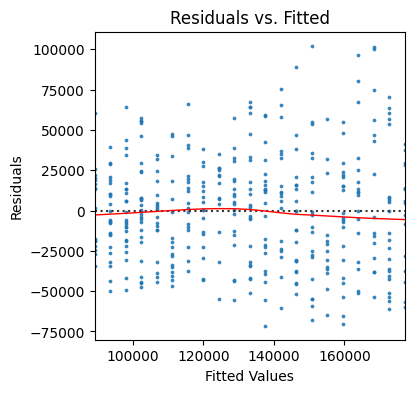

In [117]:
# Residuals vs. Fitted Values Plot
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = emp_trim['fittedvalues_raw'], 
              y = emp_trim['res_raw'],
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

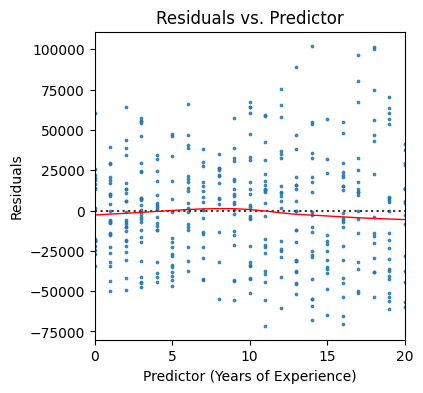

In [118]:
# Residuals vs. Predictor Plot
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = emp_trim['exp_yr'], 
              y = emp_trim['res_raw'],
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Predictor")
plt.xlabel("Predictor (Years of Experience)")
plt.ylabel("Residuals")
plt.show()

Interpret here

### 2. (I) The residuals are independent across all values of Y

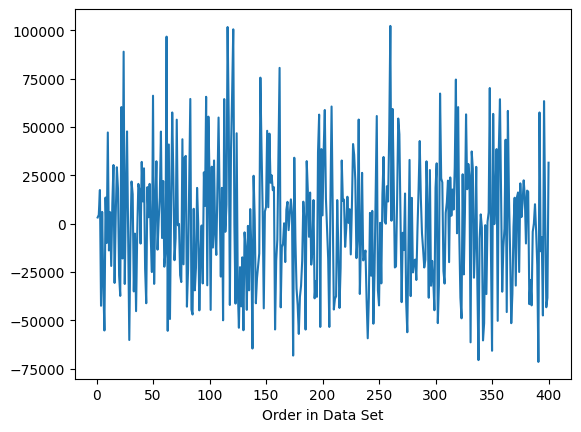

In [119]:
x_values = range(1, len(emp_trim) + 1)
plt.plot(x_values, emp_trim['res_raw'], linestyle='-')
plt.xlabel("Order in Data Set")
plt.show()

Interpret

### 3. (N) The residuals are normally distributed and centered at zero

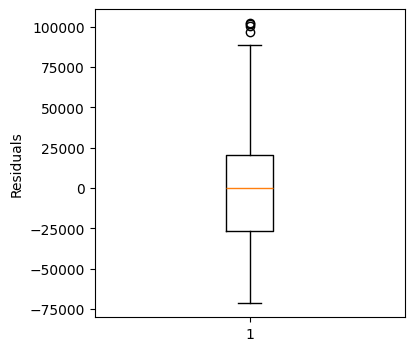

In [120]:
# Boxplot
fig = plt.figure(figsize = (4, 4))
plt.boxplot(emp_trim['res_raw'])
plt.ylabel("Residuals")
plt.show()

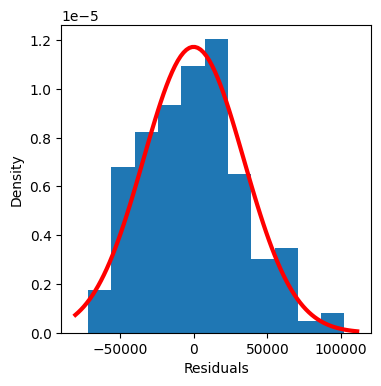

In [121]:
# Histogram
fig = plt.figure(figsize = (4, 4))

# plot histogram (density = True so that it's on the same scale as the normal distribution)
plt.hist(emp_trim['res_raw'], 
         density = True, 
         bins = 11)
plt.xlabel("Residuals")
plt.ylabel("Density")

# calculate mean and standard deviation
mean = np.mean(emp_trim['res_raw'])
sd = np.std(emp_trim['res_raw'])

# generate x values to plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# plot normal distribution curve
plt.plot(x,
         stats.norm.pdf(x, mean, sd), 
         color = 'r',
         lw = 3)
plt.show()

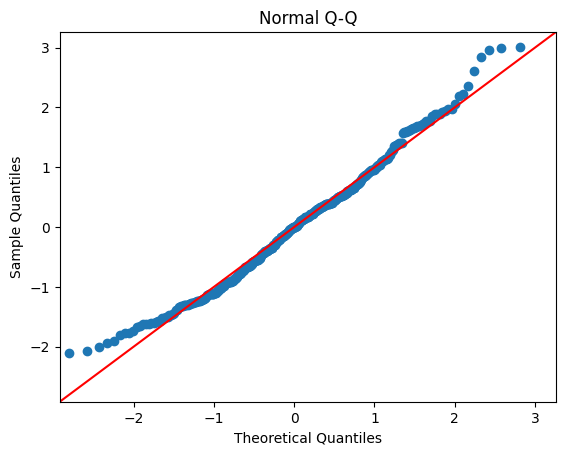

In [122]:
# Q-Q Plot (Normal Probability Plot)
sm.qqplot(emp_trim['res_raw'], 
          line = '45', 
          fit = True)
plt.title("Normal Q-Q")
plt.show()

In [123]:
# Shapiro-Wilk Test
stats.shapiro(emp_trim['res_raw'])

ShapiroResult(statistic=0.9861664447844645, pvalue=0.000731835775440286)

Interpret

### 4. (E) The residuals have constant variance across all values of x

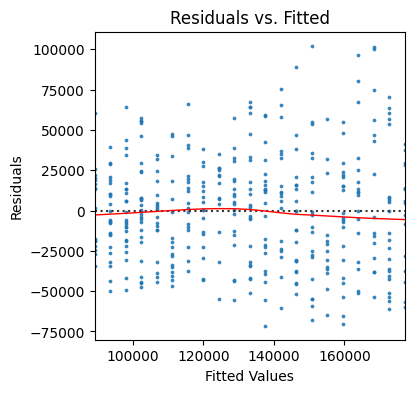

In [124]:
# Residuals vs. Fitted Values Plot
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = emp_trim['fittedvalues_raw'], 
              y = emp_trim['res_raw'],
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

Interpret

### 5. (A) The model describes all observations (i.e., there are no influential points)

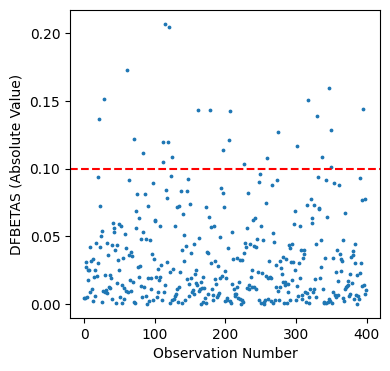

,exp_yr,salary,salary_sqrt,salary_log,exp_yr_sqrt,exp_yr_log,res_raw,fittedvalues_raw,dfbetas
115,18,269950,519.567128,12.505996,4.242641,2.944439,101641.460346,168308.539654,0.207235
120,18,268774,518.434181,12.501630,4.242641,2.944439,100465.460346,168308.539654,0.204783
61,17,260594,510.484084,12.470723,4.123106,2.890372,96680.099260,163913.900740,0.173080
347,19,242819,492.766679,12.400076,4.358899,2.995732,70115.821432,172703.178568,0.159356
317,18,242808,492.755517,12.400030,4.242641,2.944439,74499.460346,168308.539654,0.151094


In [125]:
# DFBETAS
emp_trim['dfbetas'] = res.get_influence().dfbetas[:, 1]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFBETAS (Absolute Value)")
plt.xlabel("Observation Number")
plt.scatter(emp_trim.index, 
            np.abs(emp_trim['dfbetas']), 
            s = 3)
plt.axhline(y = 2 / np.sqrt(len(emp_trim)), 
            color = 'r', 
            linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab info about potential influential points
outliers_dfbetas = emp_trim[np.abs(emp_trim['dfbetas']) > 2 / np.sqrt(len(emp_trim))]
outliers_dfbetas_sorted = outliers_dfbetas.sort_values(by = 'dfbetas', 
                                                       ascending = False)
outliers_dfbetas_sorted.head()

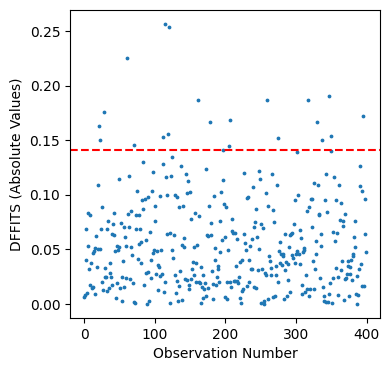

,exp_yr,salary,salary_sqrt,salary_log,exp_yr_sqrt,exp_yr_log,res_raw,fittedvalues_raw,dfbetas,dffits
115,18,269950,519.567128,12.505996,4.242641,2.944439,101641.460346,168308.539654,0.207235,0.256770
120,18,268774,518.434181,12.501630,4.242641,2.944439,100465.460346,168308.539654,0.204783,0.253732
61,17,260594,510.484084,12.470723,4.123106,2.890372,96680.099260,163913.900740,0.173080,0.225083
347,19,242819,492.766679,12.400076,4.358899,2.995732,70115.821432,172703.178568,0.159356,0.190336
317,18,242808,492.755517,12.400030,4.242641,2.944439,74499.460346,168308.539654,0.151094,0.187210


In [126]:
# DFFITS
emp_trim['dffits'] = res.get_influence().dffits[0]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFFITS (Absolute Values)")
plt.xlabel("Observation Number")
plt.scatter(emp_trim.index, 
            np.abs(emp_trim['dffits']), 
            s = 3)
plt.axhline(y = 2 * np.sqrt(len(res.params) / len(emp_trim)), 
            color = 'r', 
            linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab info about potential influential points
outliers_dffits = emp_trim[np.abs(emp_trim['dffits']) > 2 * np.sqrt(len(res.params) / len(emp_trim))]
outliers_dffits_sorted = outliers_dffits.sort_values(by = 'dffits', 
                                                     ascending = False)
outliers_dffits_sorted.head()

Interpret

### 6. Additional predictor variables are unnecessary

Interpret

## Summarize Findings:

#### 1. x vs y is linear
This assumption is met.

#### 2. The residuals are independent across all values of y
We do not know if this assumption is met or not since we are lacking information on how the data was collected.

#### 3. The residuals are normally distributed and centered at zero
The residuals look *slightly* right skewed - we can likely do better. We will transform MPG to try to improve this.

#### 4. The residuals have constant variance across all values of x
The diagnostics indicate possible, *slight* heteroscedasticity. We may want to see if we can improve this by transforming MPG.

#### 5. The model describes all observations (i.e., there are no influential points)
This assumption is met.

#### 6. Additional predictor variables are unnecessary
This assumption is likely not met, as discussed above.

## Apply transformations and recheck assumptions

In [127]:
#Apply Transformations to Salary and rerun OLS model
y_sqrt = emp_trim['salary_sqrt']
X = sm.add_constant(emp_trim['exp_yr'])

In [128]:
# Fit simple linear regression model with 
mod_trans = sm.OLS(y_sqrt, X)
res_trans = mod_trans.fit()
print(res_trans.summary())

                            OLS Regression Results                            
Dep. Variable:            salary_sqrt   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     254.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           1.09e-44
Time:                        17:39:04   Log-Likelihood:                -2103.0
No. Observations:                 400   AIC:                             4210.
Df Residuals:                     398   BIC:                             4218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        299.0119      4.368     68.460      0.0

In [129]:
#add the residuals and the fitted values to our dataframe
emp_trim['residuals_trans'] = res_trans.resid
emp_trim['fittedvalues_trans'] = res_trans.fittedvalues
emp_trim.head()

,exp_yr,salary,salary_sqrt,salary_log,exp_yr_sqrt,exp_yr_log,res_raw,fittedvalues_raw,dfbetas,dffits,residuals_trans,fittedvalues_trans
0,4,109976,331.626296,11.608027,2.000000,1.609438,3192.405143,106783.594857,-0.004369,0.006414,8.215500,323.410795
1,6,120088,346.537155,11.695988,2.449490,1.945910,4515.127314,115572.872686,-0.003995,0.007744,10.926901,335.610254
2,17,181301,425.794551,12.107919,4.123106,2.890372,17387.099260,163913.900740,0.030819,0.040079,23.087272,402.707280
3,7,77530,278.442095,11.258433,2.645751,2.079442,-42437.511600,119967.511600,0.027358,-0.068173,-63.267889,341.709984
4,13,152397,390.380584,11.934251,3.605551,2.639057,6061.654916,146335.345084,0.004866,0.010147,12.072222,378.308361


## Check all Assumptions After Transformations EVERYTHING WAS JUST COPIED OVER HERE I HAVENT CHANGED THEM TO TRANSFORMED DATA

### 1. (L) X vs Y is linear

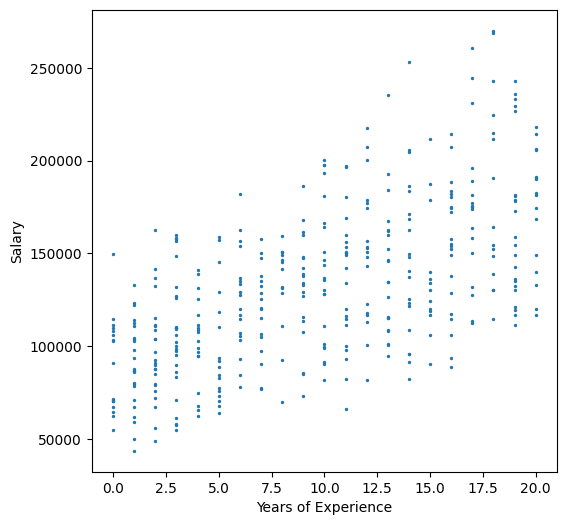

In [130]:
# Scatterplot
fig = plt.figure(figsize = (6, 6))
plt.scatter(x = emp_trim['exp_yr'], 
            y = emp_trim['salary'], 
            s = 2)
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.show()

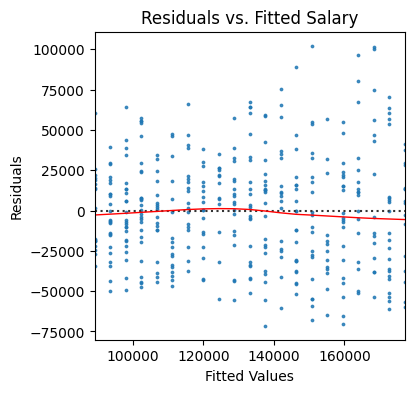

In [131]:
# Residuals vs. Fitted Values Plot
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = emp_trim['fittedvalues_raw'], 
              y = emp_trim['res_raw'],
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted Salary")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

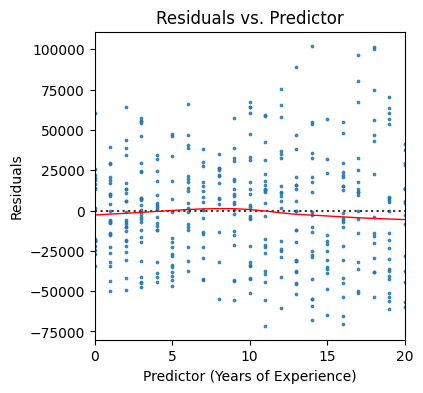

In [132]:
# Residuals vs. Predictor Plot
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = emp_trim['exp_yr'], 
              y = emp_trim['res_raw'],
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Predictor")
plt.xlabel("Predictor (Years of Experience)")
plt.ylabel("Residuals")
plt.show()

Interpret here

### 2. (I) The residuals are independent across all values of Y

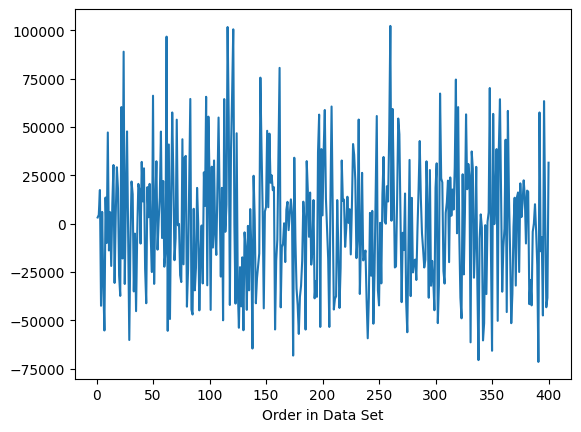

In [133]:
x_values = range(1, len(emp_trim) + 1)
plt.plot(x_values, emp_trim['res_raw'], linestyle='-')
plt.xlabel("Order in Data Set")
plt.show()

Interpret

### 3. (N) The residuals are normally distributed and centered at zero

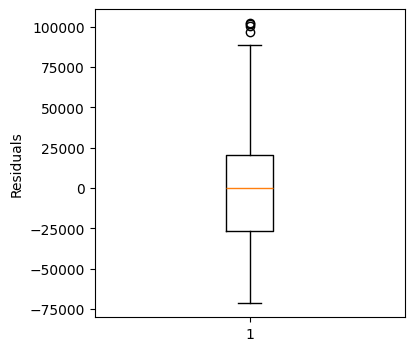

In [134]:
# Boxplot
fig = plt.figure(figsize = (4, 4))
plt.boxplot(emp_trim['res_raw'])
plt.ylabel("Residuals")
plt.show()

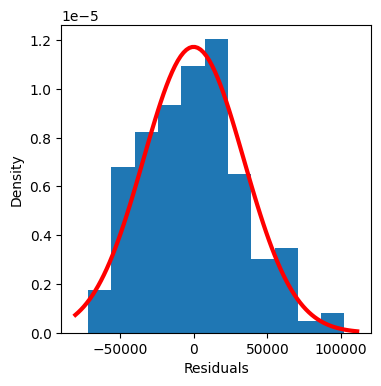

In [135]:
# Histogram
fig = plt.figure(figsize = (4, 4))

# plot histogram (density = True so that it's on the same scale as the normal distribution)
plt.hist(emp_trim['res_raw'], 
         density = True, 
         bins = 11)
plt.xlabel("Residuals")
plt.ylabel("Density")

# calculate mean and standard deviation
mean = np.mean(emp_trim['res_raw'])
sd = np.std(emp_trim['res_raw'])

# generate x values to plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# plot normal distribution curve
plt.plot(x,
         stats.norm.pdf(x, mean, sd), 
         color = 'r',
         lw = 3)
plt.show()

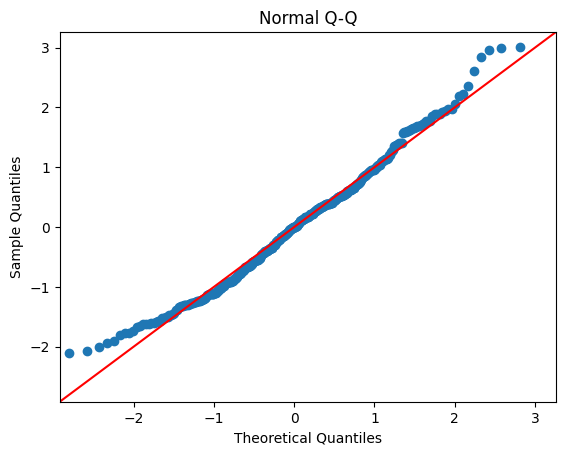

In [136]:
# Q-Q Plot (Normal Probability Plot)
sm.qqplot(emp_trim['res_raw'], 
          line = '45', 
          fit = True)
plt.title("Normal Q-Q")
plt.show()

In [137]:
# Shapiro-Wilk Test
stats.shapiro(emp_trim['res_raw'])

ShapiroResult(statistic=0.9861664447844645, pvalue=0.000731835775440286)

Interpret

### 4. (E) The residuals have constant variance across all values of x

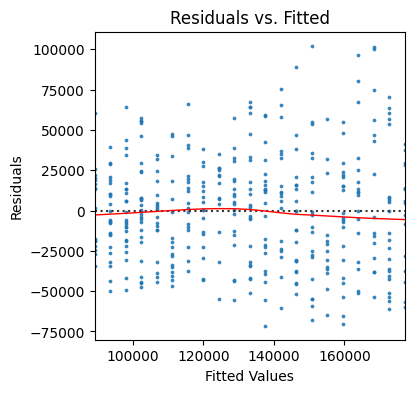

In [138]:
# Residuals vs. Fitted Values Plot
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = emp_trim['fittedvalues_raw'], 
              y = emp_trim['res_raw'],
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

Interpret

### 5. (A) The model describes all observations (i.e., there are no influential points)

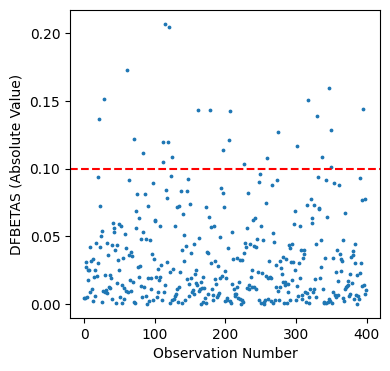

,exp_yr,salary,salary_sqrt,salary_log,exp_yr_sqrt,exp_yr_log,res_raw,fittedvalues_raw,dfbetas,dffits,residuals_trans,fittedvalues_trans
115,18,269950,519.567128,12.505996,4.242641,2.944439,101641.460346,168308.539654,0.207235,0.256770,110.760118,408.807009
120,18,268774,518.434181,12.501630,4.242641,2.944439,100465.460346,168308.539654,0.204783,0.253732,109.627172,408.807009
61,17,260594,510.484084,12.470723,4.123106,2.890372,96680.099260,163913.900740,0.173080,0.225083,107.776804,402.707280
347,19,242819,492.766679,12.400076,4.358899,2.995732,70115.821432,172703.178568,0.159356,0.190336,77.859940,414.906739
317,18,242808,492.755517,12.400030,4.242641,2.944439,74499.460346,168308.539654,0.151094,0.187210,83.948508,408.807009


In [139]:
# DFBETAS
emp_trim['dfbetas'] = res.get_influence().dfbetas[:, 1]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFBETAS (Absolute Value)")
plt.xlabel("Observation Number")
plt.scatter(emp_trim.index, 
            np.abs(emp_trim['dfbetas']), 
            s = 3)
plt.axhline(y = 2 / np.sqrt(len(emp_trim)), 
            color = 'r', 
            linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab info about potential influential points
outliers_dfbetas = emp_trim[np.abs(emp_trim['dfbetas']) > 2 / np.sqrt(len(emp_trim))]
outliers_dfbetas_sorted = outliers_dfbetas.sort_values(by = 'dfbetas', 
                                                       ascending = False)
outliers_dfbetas_sorted.head()

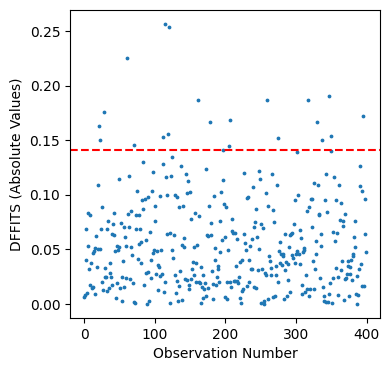

,exp_yr,salary,salary_sqrt,salary_log,exp_yr_sqrt,exp_yr_log,res_raw,fittedvalues_raw,dfbetas,dffits,residuals_trans,fittedvalues_trans
115,18,269950,519.567128,12.505996,4.242641,2.944439,101641.460346,168308.539654,0.207235,0.256770,110.760118,408.807009
120,18,268774,518.434181,12.501630,4.242641,2.944439,100465.460346,168308.539654,0.204783,0.253732,109.627172,408.807009
61,17,260594,510.484084,12.470723,4.123106,2.890372,96680.099260,163913.900740,0.173080,0.225083,107.776804,402.707280
347,19,242819,492.766679,12.400076,4.358899,2.995732,70115.821432,172703.178568,0.159356,0.190336,77.859940,414.906739
317,18,242808,492.755517,12.400030,4.242641,2.944439,74499.460346,168308.539654,0.151094,0.187210,83.948508,408.807009


In [140]:
# DFFITS
emp_trim['dffits'] = res.get_influence().dffits[0]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFFITS (Absolute Values)")
plt.xlabel("Observation Number")
plt.scatter(emp_trim.index, 
            np.abs(emp_trim['dffits']), 
            s = 3)
plt.axhline(y = 2 * np.sqrt(len(res.params) / len(emp_trim)), 
            color = 'r', 
            linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab info about potential influential points
outliers_dffits = emp_trim[np.abs(emp_trim['dffits']) > 2 * np.sqrt(len(res.params) / len(emp_trim))]
outliers_dffits_sorted = outliers_dffits.sort_values(by = 'dffits', 
                                                     ascending = False)
outliers_dffits_sorted.head()

Interpret

### 6. Additional predictor variables are unnecessary

Interpret

### Overall Summary of assumptions After transformations: were they met, did anything change?

# Model Assesment

### $R^2$

- Raw Data Model Performace
    - value here
- Transformed Salary Model Performance
    - Value
- Interpretation:
    - Value

### F - Test

- Raw Data Model Performace
    - value here
- Transformed Salary Model Performance
    - Value

- Interpretation:
    - value

### RMSE

- Raw Data Model Performace
    - value here
- Transformed Salary Model Performance
    - Value

- Interpretation:
    - value

### MAE

- Raw Data Model Performace
    - value here
- Transformed Salary Model Performance
    - Value

- Interpretation:
    - value

## Final Model Choice

- Model

# Statistical inference

### Confidence Intervals - Slope and Intercepts

### Hypothesis Testing - SLope

### confidence interval for the mean of $Y$


### Prediction Interval For An Individual Observation

# Summary

 - findings